In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../clean_data/df_3to1.csv")
# Warning: for TAU,PTAU, ABETA -> fine, I'm not using them
df.drop(df.columns[[14,15,16]], axis=1, inplace=True)

/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_51957/2946325104.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../clean_data/df_3to1.csv")


In [59]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
def d_overview(df):
    print(f"Dimension: {df.shape}")
    output = df.apply(lambda x: (x.dtype,x.isna().mean(),x.unique()), axis=0).T
    output.columns = ["dtype", "NaN_precentage","unique"]
    return output.sort_values(by="NaN_precentage", ascending=False)

In [28]:
display(d_overview(df))

Dimension: (11364, 87)


,dtype,NaN_precentage,unique
PIB,float64,0.980465,"[nan, 2.3575, 2.1275, 2.0725, 2.19, 2.27, 2.35..."
FBB,float64,0.955209,"[nan, 1.0714, 1.0372, 0.9902, 0.9959, 0.9602, ..."
TAU_UPENN,float64,0.811246,"[nan, 61.4, 76.5, 41.8, 49.4, 116.0, 120.0, 12..."
PTAU_UPENN,float64,0.809222,"[nan, 20.4, 21.1, 12.9, 13.5, 67.2, 40.5, 28.5..."
ABETA_UPENN,float64,0.809134,"[nan, 131.0, 137.0, 256.0, 246.0, 116.0, 136.0..."
AV45,float64,0.731345,"[nan, 1.3496, 0.9804, 0.9851, 0.994, 0.9416, 0..."
OTHER,float64,0.69113,"[nan, 0.0, 1.0]"
DPMOOD,float64,0.69069,"[nan, 0.0, 1.0]"
INSOMN,float64,0.690602,"[nan, 1.0, 0.0]"
ABDOMN,float64,0.690602,"[nan, 0.0, 1.0]"


In [121]:
df_prog.loc[df["RID"]==3]

,RID,DX,VISCODE
1,3,3,0
2,3,3,6
3,3,3,12
4,3,3,24


### Check baseline MCI progression

In [134]:
df_prog = df[["RID","DX","VISCODE"]]
print("Baseline count:")
df_prog["DX"][df_prog.VISCODE==0].value_counts().sort_index()
display(pd.crosstab(df_prog["DX"], df_prog["VISCODE"]))
start_AD = df_prog["RID"][(df_prog["VISCODE"]==0) & (df_prog["DX"]==3)]
start_MCI = df_prog["RID"][(df_prog["VISCODE"]==0) & (df_prog["DX"]==2)]
start_CN = df_prog["RID"][(df_prog["VISCODE"]==0) & (df_prog["DX"]==1)]
df_mci = df_prog.loc[(df_prog["VISCODE"].isin([0,12,24]))&         # keep time point 0,12,24
            (df_prog["RID"].isin(start_MCI))             # rm start with AD
           ]  
pd.crosstab(df_mci["DX"],df_mci["VISCODE"])

Baseline count:


VISCODE,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102,108,114,120,126,132,138,144,150,156,162,168,174,180,186,192,198
DX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,892,491,493,13,577,30,251,10,350,30,138,51,164,43,101,36,87,20,50,19,49,9,26,4,11,5,17,7,0,1,10,4,0,1
2,1096,770,801,231,549,10,421,2,283,13,161,23,117,31,104,37,72,28,54,14,46,12,20,12,13,7,5,1,5,3,3,2,2,0
3,413,355,418,97,382,9,207,2,145,1,88,13,73,11,53,10,47,6,35,4,19,6,7,6,6,5,4,2,0,0,1,0,1,0


VISCODE,0,12,24
DX,,,
1,0,30,39
2,1096,778,512
3,0,109,191


### Use Lag for Data Augmentation

In [113]:
DX_lag = df_prog.groupby(['RID'])['DX'].shift(1)
VISCODE_lag = df_prog.groupby(['RID'])['VISCODE'].shift(1)
df_lag = pd.concat([DX_lag, VISCODE_lag], axis=1)
df_lag.columns = ["DX_lag","VISCODE_lag"]
df_lag = pd.concat([df_prog, df_lag], axis=1)

In [119]:
df_lag.loc[(df_lag["VISCODE"].isin([0,12,24]))&         # keep time point 0,12,24
            ~((df_lag["VISCODE"]==0) & (df_prog["DX"]==3))  # rm start with AD
           ]  

,RID,DX,VISCODE,DX_lag,VISCODE_lag
0,2,1,0,NaN,NaN
3,3,3,12,3.0,6.0
4,3,3,24,3.0,12.0
5,4,2,0,NaN,NaN
7,4,2,12,2.0,6.0
...,...,...,...,...,...
11351,6291,1,24,2.0,12.0
11354,6939,2,12,3.0,0.0
11355,7105,2,0,NaN,NaN
11356,7016,2,12,2.0,0.0


### Visualization the relation of disease progression

In [45]:
df_prog = df_prog.loc[~((df_prog["DX"]==3) & (df_prog['VISCODE']==0))]
# RID for the ones start with 1,2,3:
for i in range(1,4):
    bl_val = df_lineplt["RID"][(df_lineplt["VISCODE"]=="bl") & (df_lineplt["DX"]==i) ] 
    df_sub = df_lineplt[df_lineplt["RID"].isin(bl_val)]
    df_sub.set_index('VISCODE', inplace=True)
    df_sub.groupby('RID')['DX'].plot(legend=False)


NameError: name 'df_3to1' is not defined

RID
2       AxesSubplot(0.125,0.11;0.775x0.77)
5       AxesSubplot(0.125,0.11;0.775x0.77)
8       AxesSubplot(0.125,0.11;0.775x0.77)
14      AxesSubplot(0.125,0.11;0.775x0.77)
15      AxesSubplot(0.125,0.11;0.775x0.77)
                       ...                
7080    AxesSubplot(0.125,0.11;0.775x0.77)
7082    AxesSubplot(0.125,0.11;0.775x0.77)
7089    AxesSubplot(0.125,0.11;0.775x0.77)
7092    AxesSubplot(0.125,0.11;0.775x0.77)
7100    AxesSubplot(0.125,0.11;0.775x0.77)
Name: DX, Length: 892, dtype: object

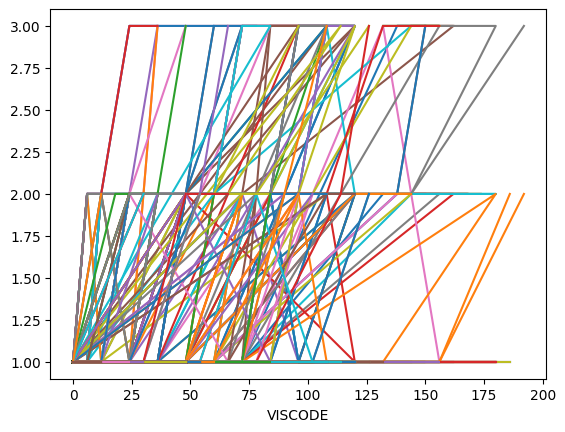